In [3]:
import numpy as np
import random as r
import pandas as pd
import matplotlib.pyplot as plt
import timeit as tt
import statistics as st
import jax.numpy as jnp
from jax import grad
import sympy as smp

**1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.**

Every element in the resultant matrix is dot product of the rows (n) and columns (m) of length k.\
For each element, the number of multiplication is k and the number of additions is k-1. This happens for a total of n.m elements.\
Therefore,\
total number of multiplications = n.m.k\
total number of additions = n.m.(k-1)

**2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?**

In [4]:
n = 5
k = 6
m = 7

# initialize matrices m1 and m2
m1 = []
for i in range(n):
  column = []
  for j in range(k):
    column.append(r.randint(1,9))
  m1.append(column)

m2 = []
for i in range(k):
  column = []
  for j in range(m):
    column.append(r.randint(1,9))
  m2.append(column)

# matrix to store the result 
m3 = []
for i in range(n):
  column = []
  for j in range(m):
    column.append(0)
  m3.append(column)

time1 = []
time2 = []

# list method
def f1(m1,m2,m3):
  for i in range (len(m1)):
    for j in range (len(m2[0])):
      for p in range (len(m1[0])):
        m3[i][j] += m1[i][p]*m2[p][j]
  return m3

# numpy method
def f2(m1,m2):
  return np.dot(m1,m2)

print("m1 = ", m1)
print("m2 =", m2)
print("result 1 (list method) = ", f1(m1,m2,m3))
print("result 2 (numpy method)= ", f2(m1,m2))

for count in range(1000):
  
  for i in range(n):
    for j in range(m):
      m3[i][j] = 0

  t0 = tt.default_timer()
  result1 = f1(m1,m2,m3)
  t1 = tt.default_timer()
  time = (t1 - t0)*1000000
  time1.append(time)


  t0 = tt.default_timer() 
  result2 = f2(m1,m2)
  t1 = tt.default_timer()
  time = (t1 - t0)*1000000
  time2.append(time)

# average times
ti1 = sum(time1)/len(time1)
ti2 = sum(time2)/len(time2)
ti1 = round(ti1,3)
ti2 = round(ti2,3)

# sd's
sd1 = st.pstdev(time1)
sd2 = st.pstdev(time2)
sd1 = round(sd1,3)
sd2 = round(sd2,3)

print("list method: ", ti1,"+/-", sd1, " micro sec")
print("numpy method: ", ti2,"+/-", sd2, " micro sec")

m1 =  [[9, 6, 8, 8, 5, 1], [1, 1, 2, 8, 5, 1], [5, 9, 8, 9, 2, 7], [5, 3, 5, 4, 5, 9], [8, 3, 7, 2, 2, 3]]
m2 = [[4, 2, 2, 2, 8, 1, 9], [2, 5, 4, 4, 3, 8, 6], [4, 7, 2, 1, 7, 9, 7], [4, 8, 5, 6, 7, 7, 3], [4, 9, 1, 6, 1, 7, 2], [5, 8, 5, 3, 8, 2, 6]]
result 1 (list method) =  [[137, 221, 108, 131, 215, 222, 213], [71, 138, 60, 89, 94, 120, 69], [149, 257, 144, 141, 244, 240, 228], [127, 209, 102, 108, 189, 155, 174], [97, 138, 69, 68, 162, 129, 167]]
result 2 (numpy method)=  [[137 221 108 131 215 222 213]
 [ 71 138  60  89  94 120  69]
 [149 257 144 141 244 240 228]
 [127 209 102 108 189 155 174]
 [ 97 138  69  68 162 129 167]]
list method:  36.201 +/- 13.639  micro sec
numpy method:  14.263 +/- 12.285  micro sec


We can see that using numpy is faster because it does the calculations in a parallel manner. Numpy libraries are written in C or C++ which makes it faster.

**3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?**

If the size of the array is n, then the time complexity of finding the median of the array will be $O(n^{\lceil \frac{n}{2} \rceil})$.\
A better method would be to sort the array in $O(nlog(n))$ time and then finding the middle element in $O(1)$ time.

In [5]:
# assume odd length array
num = []
n = 999
for h in range(n):
  num.append(r.randint(1,101))
copy = num.copy()
iterations = n//2

# ceil(n/2) passes
def f3(num):
  for r in range(iterations):
    max = num[0]
    for t in range(1,len(num)):
      if num[t] > max:
        max = num[t]
    num.remove(max)
  max = num[0]
  for t in range(1,len(num)):
    if num[t] > max:
      max = num[t]
  return max

# sorting method
def f4():
  num.sort()
  return num[iterations]

# numpy.median method
def f5():
  return np.median(num)
  
print(f3(copy))
print(f4())
print(int(f5()))

time3 = []
time4 = []
time5 = []
# time calculation
for count in range(1000):
  copy = num.copy()

  t0 = tt.default_timer()
  r3 = f3(copy)
  t1 = tt.default_timer()
  time = (t1 - t0)*1000000
  time3.append(time)


  t0 = tt.default_timer() 
  r4 = f4()
  t1 = tt.default_timer()
  time = (t1 - t0)*1000000
  time4.append(time)

  t0 = tt.default_timer() 
  r5 = f5()
  t1 = tt.default_timer()
  time = (t1 - t0)*1000000
  time5.append(time)

# average times
ti3 = sum(time3)/len(time3)
ti4 = sum(time4)/len(time4)
ti5 = sum(time5)/len(time5)
ti3 = round(ti3,3)
ti4 = round(ti4,3)
ti5 = round(ti5,3)
# sd's
sd3 = st.pstdev(time3)
sd4 = st.pstdev(time4)
sd5 = st.pstdev(time5)
sd3 = round(sd3,3)
sd4 = round(sd4,3)
sd5 = round(sd5,3)

print("n//2 pass method: ", ti3,"+/-", sd3, " micro sec")
print("sort method: ", ti4,"+/-", sd4, " micro sec")
print("numpy method: ", ti5,"+/-", sd5, " micro sec")

51
51
51
n//2 pass method:  14923.477 +/- 1978.312  micro sec
sort method:  6.982 +/- 2.218  micro sec
numpy method:  136.807 +/- 49.25  micro sec


The order of time complexities is as follows:\
repeated traversal >> numpy.median() > sort().


**4. What is the gradient of the following function with respect to x and y?\
$x^2y + y^3sin(x)$**


wrt $x$, the gradient is $2xy$ $+$ $y^3cos(x)$\
wrt $y$, the gradient is $x^2$ $+$ $3y^2sin(x)$

**5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y**

In [6]:
def f(x, y):
  return x**2*y + y**3*jnp.sin(x)

# manual derivatives
def fx(x, y):
  return 2*x*y + y**3*jnp.cos(x)
def fy(x, y):
  return x**2 + 3*y**2*jnp.sin(x)


df_dx = grad(f, argnums=0)
df_dy = grad(f, argnums=1)
for i in range(5):
  x = round(r.uniform(0.0,10.0),2)
  y = round(r.uniform(0.0,10.0),2)
  print(x,y)
  print("wrt x- JAX: ",float(df_dx(x, y))," manual: ",float(fx(x,y)))
  print("wrt y- JAX: ",float(df_dy(x, y))," manual: ",float(fy(x,y)))

8.07 8.43
wrt x- JAX:  7.6528472900390625  manual:  7.6528472900390625
wrt y- JAX:  273.36468505859375  manual:  273.36468505859375
2.71 6.02
wrt x- JAX:  -165.53302001953125  manual:  -165.53302001953125
wrt y- JAX:  52.82412338256836  manual:  52.824127197265625
4.81 0.71
wrt x- JAX:  6.8650803565979  manual:  6.865080833435059
wrt y- JAX:  21.631000518798828  manual:  21.631000518798828
2.36 5.63
wrt x- JAX:  -100.09139251708984  manual:  -100.09139251708984
wrt y- JAX:  72.55252838134766  manual:  72.55252075195312
1.88 9.21
wrt x- JAX:  -203.09881591796875  manual:  -203.09881591796875
wrt y- JAX:  245.9386749267578  manual:  245.93865966796875


**6. Use sympy to confirm that you obtain the same gradient analytically.**

In [7]:
x, y = smp.symbols('x y', real = True)
f = x**2*y + y**3*smp.sin(x)

df_dx = smp.diff(f, x)
df_dy = smp.diff(f, y)
print(df_dx)
print(df_dy)

2*x*y + y**3*cos(x)
x**2 + 3*y**2*sin(x)


**7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.** 

In [10]:
college = {}
college[2022] = {'Branch 1':{}, 'Branch 2':{}}
college[2023] = {'Branch 1':{}, 'Branch 2':{}}
college[2024] = {'Branch 1':{}, 'Branch 2':{}}
college[2025] = {'Branch 1':{}, 'Branch 2':{}}
college[2022]['Branch 1'] = {'Roll Number': '1','Name':'Max','Marks':{'Maths':100, 'English':99, 'Physics':70}}
college[2024]['Branch 2'] = {'Roll Number': '3','Name':'Pam','Marks':{'Maths':60, 'English':80, 'Physics':90}}
college[2023]['Branch 2'] = {}
print(college[2024])

{'Branch 1': {}, 'Branch 2': {'Roll Number': '3', 'Name': 'Pam', 'Marks': {'Maths': 60, 'English': 80, 'Physics': 90}}}


**8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.**

In [12]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

    def __str__(self):
        return f"Roll Number: {self.roll_number}, Name: {self.name}, Marks: {self.marks}"


class Branch:
    def __init__(self, name, students=None):
        self.name = name
        self.students = students or []

    def add_student(self, student):
        self.students.append(student)

    def __str__(self):
        students_info = "\n".join(str(student) for student in self.students)
        return f"{self.name}\n{students_info}"


class Year:
    def __init__(self, year, branches=None):
        self.year = year
        self.branches = branches or []

    def add_branch(self, branch):
        self.branches.append(branch)

    def __str__(self):
        branches_info = "\n".join(str(branch) for branch in self.branches)
        return f"{self.year}\n{branches_info}"


# Creating instances and storing information
student1 = Student(1, "Max", {'Maths':100, 'English':99, 'Physics':70})
student2 = Student(3, "Pam", {'Maths':60, 'English':80, 'Physics':90})

branch1 = Branch("Branch 1", [student1])
branch2 = Branch("Branch 2", [student2])

year2022 = Year(2022, [branch1, branch2])

# Add more years and branches as needed

# Creating the overall database
database = [year2022]

# Printing the information
for year in database:
    print(year)

2022
Branch 1
Roll Number: 1, Name: Max, Marks: {'Maths': 100, 'English': 99, 'Physics': 70}
Branch 2
Roll Number: 3, Name: Pam, Marks: {'Maths': 60, 'English': 80, 'Physics': 90}


**9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.**

**$y$ $=$ $x$**

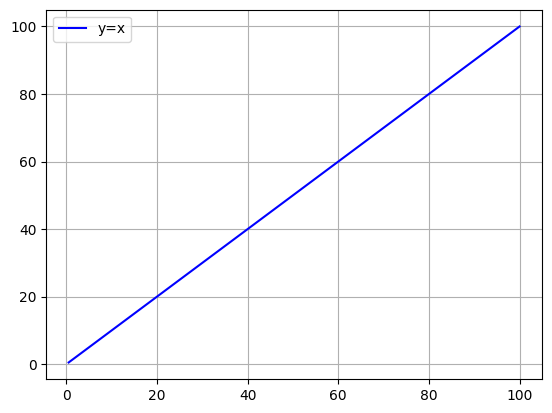

In [13]:
x = np.linspace(0.5,100,200)
y1 = x
plt.plot(x, y1, '-b', label='y=x')
plt.legend(loc='upper left')
plt.grid()
plt.show()

**$y$ $=$ $x^2$, $y$ $=$ $x^3/100$**

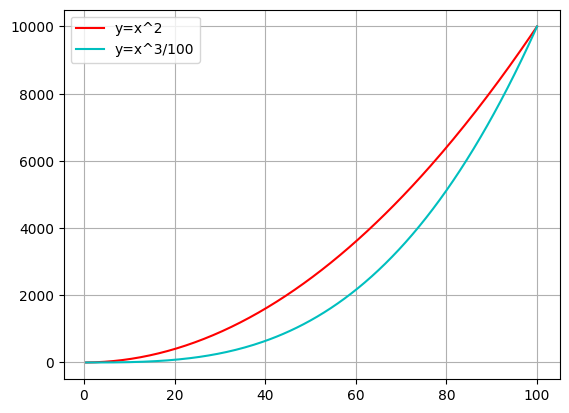

In [14]:
y2 = x*x
y3 = (x**3)/100
plt.plot(x, y2, '-r', label='y=x^2')
plt.plot(x, y3, '-c', label='y=x^3/100')
plt.legend(loc='upper left')
plt.grid()
plt.show()

**$y$ $=$ $sin(x)$, $y$ $=$ $sin(x)/x$, $y$ $=$ $log(x)$**

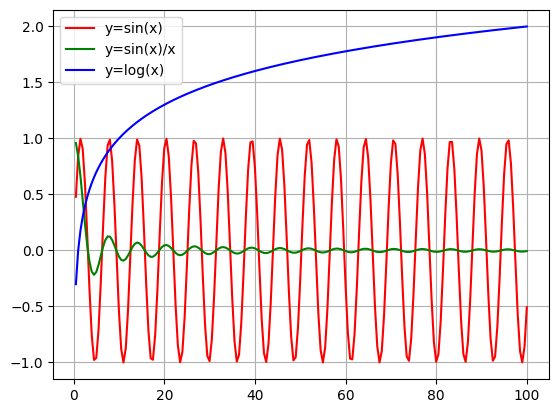

In [15]:
y4 = np.sin(x)
y5 = np.sin(x)/x
y6 = np.log10(x)
plt.plot(x, y4, '-r', label='y=sin(x)')
plt.plot(x, y5, '-g', label='y=sin(x)/x')
plt.plot(x, y6, '-b', label='y=log(x)')
plt.legend(loc='upper left')
plt.grid()
plt.show()

**$y$ $=$ $e^x$**

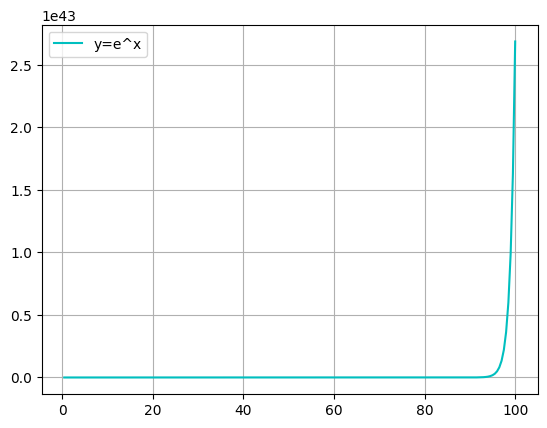

In [16]:
y7 = np.exp(x)
plt.plot(x, y7, '-c', label='y=e^x')
plt.legend(loc='upper left')
plt.grid()
plt.show()

**10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.**

In [18]:
m = []
for i in range(20):
  column = []
  for j in range(5):
    column.append(r.uniform(1.0,2.0))
  m.append(column)

df = pd.DataFrame(m, columns=['a', 'b', 'c', 'd', 'e'])
print(df)

# separate dataframe containing standard deviations
ar = df.std(axis=0)
print("Column with highest SD: ", ar.idxmax())

#separate dataframe containing means
arra = df.mean(axis=1)
print("Row with lowest mean: ", arra.idxmin())

           a         b         c         d         e
0   1.742343  1.339705  1.027493  1.261891  1.791561
1   1.123148  1.667779  1.567074  1.317702  1.612719
2   1.459403  1.063891  1.264257  1.959154  1.818650
3   1.621918  1.089427  1.871468  1.568053  1.162517
4   1.928894  1.154834  1.745864  1.544800  1.306988
5   1.325504  1.133005  1.056589  1.502014  1.049858
6   1.855790  1.217205  1.183078  1.290861  1.530381
7   1.873578  1.844979  1.714484  1.134461  1.361611
8   1.358341  1.187821  1.038031  1.172038  1.208871
9   1.333690  1.131084  1.398760  1.687349  1.082602
10  1.471920  1.206115  1.718936  1.855088  1.505322
11  1.555447  1.229125  1.958397  1.069970  1.844540
12  1.526173  1.796185  1.318671  1.206857  1.182399
13  1.472580  1.298384  1.007219  1.027528  1.967776
14  1.324562  1.710053  1.839942  1.402044  1.753880
15  1.063905  1.111657  1.571954  1.300172  1.232044
16  1.854064  1.975888  1.808182  1.658387  1.830654
17  1.810418  1.007677  1.693219  1.829372  1.

**11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.**

In [21]:
sum = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)
df['f'] = sum

df.loc[df['f'] < 8, 'g'] = 'LT8'
df.loc[df['f'] >= 8, 'g'] = 'GT8'

print(df)

           a         b         c         d         e         f    g
0   1.742343  1.339705  1.027493  1.261891  1.791561  7.162993  LT8
1   1.123148  1.667779  1.567074  1.317702  1.612719  7.288421  LT8
2   1.459403  1.063891  1.264257  1.959154  1.818650  7.565357  LT8
3   1.621918  1.089427  1.871468  1.568053  1.162517  7.313382  LT8
4   1.928894  1.154834  1.745864  1.544800  1.306988  7.681379  LT8
5   1.325504  1.133005  1.056589  1.502014  1.049858  6.066969  LT8
6   1.855790  1.217205  1.183078  1.290861  1.530381  7.077315  LT8
7   1.873578  1.844979  1.714484  1.134461  1.361611  7.929114  LT8
8   1.358341  1.187821  1.038031  1.172038  1.208871  5.965102  LT8
9   1.333690  1.131084  1.398760  1.687349  1.082602  6.633485  LT8
10  1.471920  1.206115  1.718936  1.855088  1.505322  7.757382  LT8
11  1.555447  1.229125  1.958397  1.069970  1.844540  7.657479  LT8
12  1.526173  1.796185  1.318671  1.206857  1.182399  7.030286  LT8
13  1.472580  1.298384  1.007219  1.027528  1.96

**12. Write a small piece of code to explain broadcasting in numpy.**

In [22]:
arr1 = np.array([[1, 2, 3],
                 [4, 5, 6]])

arr2 = np.array([10, 20, 30])

result = arr1 + arr2

print("Array 1:")
print(arr1)

print("\nArray 2:")
print(arr2)

print("\nResult after broadcasting:")
print(result)


Array 1:
[[1 2 3]
 [4 5 6]]

Array 2:
[10 20 30]

Result after broadcasting:
[[11 22 33]
 [14 25 36]]


arr1.shape is (2,3) and arr2.shape is (1,3). arr2[0, : ] is broadcast to its other row to make the shapes identical for addition. 

**13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.**

In [25]:
number = int(input("Enter the size of the array: "))
a = list(map(int,input("\nEnter the numbers (separated by space): ").strip().split()))[:number]
arr = np.array(a)

def f(arr):
  min = arr[0]
  i = 0
  # calcuate argmin
  for h in range(1,number):
    if arr[h] < min:
      min = arr[h]
      i = h
  return i

print("Result using function method: " + str(f(arr)))
print("Result using numpy method: " + str(np.argmin(arr)))

Result using function method: 3
Result using numpy method: 3
